In [153]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
from tqdm import tqdm
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
stat = np.loadtxt("VI/samples.txt")
not_rush_samples = stat[np.where(stat[:,0] == 0)].astype(int)
rush_samples = stat[np.where(stat[:,0] == 1)].astype(int)

In [154]:
not_rush_samples.astype(int)

array([[0, 2, 2, 0, 2, 2],
       [0, 2, 2, 3, 2, 2],
       [0, 2, 2, 3, 2, 2],
       ...,
       [0, 4, 4, 3, 4, 4],
       [0, 4, 4, 2, 4, 3],
       [0, 4, 3, 2, 4, 2]])

In [156]:
T = np.zeros((26,4,26))
T[(not_rush_samples[:,1]*5+not_rush_samples[:,2]).astype(int), (not_rush_samples[:,3]).astype(int)\
    , (not_rush_samples[:,4]*5+not_rush_samples[:,4]).astype(int)]+=1

In [164]:
N = np.zeros((26, 4))
for sample in not_rush_samples:
    T[sample[1]*5+sample[2], sample[3], sample[4]*5+sample[5]] += 1
    N[sample[1]*5+sample[2], sample[3]] += 1

In [176]:
T = np.einsum('ijk, ij -> ijk', T, np.divide(1, N, out=np.zeros_like(N), where=N!=0))

In [180]:
np.dot(directions, [0,1])

array([ 0,  0, -1,  1])

In [181]:
directions

[[-1, 0], [1, 0], [0, -1], [0, 1]]

/Users/dzg/Box/aa228/AA228_FinalProject/src/gridDelivery.py:264: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/dzg/Box/aa228/AA228_FinalProject/src/gridDelivery.py:266: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


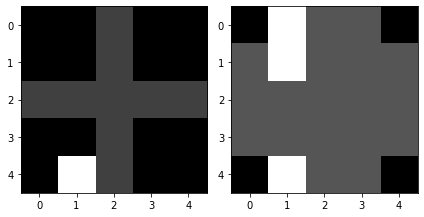

In [6]:
import matplotlib.animation as animation
from IPython import display

animation_1 = animation.FuncAnimation(plt.gcf(), grid.plot, interval = 100, frames=100)
video_1 = animation_1.to_html5_video()
html_code_1 = display.HTML(video_1)
display.display(html_code_1)
plt.tight_layout()
plt.show()

In [52]:
np.ravel_multi_index((0,0,0,1),(5,5,5,5))

1